[View in Colaboratory](https://colab.research.google.com/github/boazde/uhd/blob/master/1lesson.ipynb)

# Very simaple image recognition

1. Load data
2. Examine data
3. Play with data
4. run prelimianry models
5. Evaluate
6. "deploy"

Some packages exist in colab, others need to be installed with the pip command

## Intro to colab and python

1. select cell and Ctrl+enter to run it, you can also click the > on the right

In [1]:
 
# lines start # are comments
1+1

2

2   you can add a code or text cell from the tool bar above.

you can delete a cell and it's out put with the menu on the right (thre points)

Exercise: delete now the above output and cell

3 command line can be accessed with !:

In [5]:

! ls


datalab


useful commands: 
ls - list files in directory
cd - change directory
mv - move a file
wget - download a file from url

In [0]:
# 4. basic python
# python is a scripting llanguage with dynamic typing. which menas you can set every variable to anything at anytime

a=1

In [0]:
b=2

In [4]:
a+b

3

In [0]:
b='word'

In [10]:
# python has 2 very useful data structures: list and dict

#list

l = [1,2,1,2,3]

# list elelments can be accessed with square brackets

l[2]

1

In [8]:
# dict
d = {'a':1,'b':2}

d['a']

# exercise: add a new element to d, with key 'c' and value 1

1

In [9]:
# python has gunctions that can be used as func(input)

len(l) # len shows the length of a list or any other data type with length

5

In [11]:
# some functions need to be imported
from collections import Counter

Counter(l)

Counter({1: 2, 2: 2, 3: 1})

In [0]:
Counter() # standing with cursor in function brackets and pressin tab, shows documentation for function. do it now

In [0]:
# you can also use this:
?Counter()

In [0]:
# you can always download this files and use them on your own computer, but you have to have Jupyter notebook installed.

In This section we are going to train a simple hand written digit classifier, and also learn about python packages for data science:

- numpy
- pandas
- scikit leanrn

## Init

In [0]:
 # imports
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  from collections import Counter
  # sk learn is the leading machine learning package
  
  from sklearn.datasets import load_digits # sklearn has some data sets for experimenting

In [0]:
#from sklearn.datasets import 
# http://scikit-learn.org/stable/datasets/index.html

In [0]:
# we load the digits
digits = load_digits()

In [25]:
# and look at the data
# dot notations is also used in python for sub-elements
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [26]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [80]:
# digits is an image dataset of 8x8 digits. (1797 X 64 (8x8)) each entry is a 0-255 pixel
digits.data.shape


(1797, 64)

In [81]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

## Load and examine data

### Numpy

In [82]:
type(digits.data)

numpy.ndarray

In [83]:
# use numpy (matrix library) and matplotlib (drawing library) to plot the digits
# 1. numpy slicing
digits.data[5] # row 5
digits.data[5:7] # rows 5 to 7
digits.data[5:7,1:5] # rows 5-7, columns 1-5
digits.data[[1,5,7],[2,4,6]]
            

array([ 0.,  0., 15.])

In [84]:
# make a square
digits.data[0].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [85]:
# numpy is also a good tool for random numbers in python
print(np.random.randint(10))# an integer from 0 to 9



2


In [86]:
np.random.choice([1,5,3]) #choose from list

1

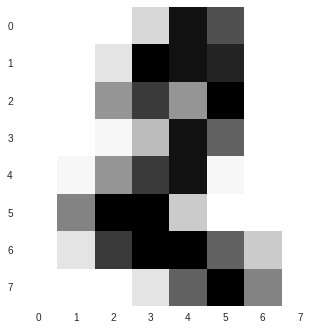

In [87]:
# show square
plt.imshow(digits.data[2].reshape([8,8]))
plt.grid(False)

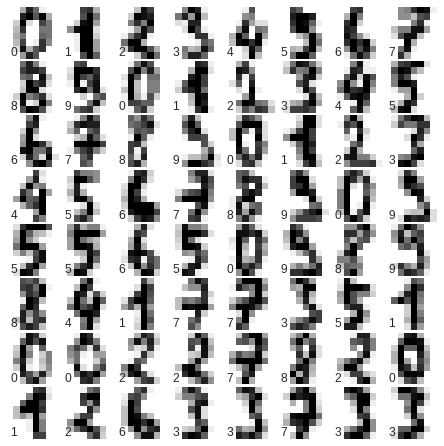

In [88]:
# Figure size (width, height) in inches
fig = plt.figure(figsize=(6, 6))

# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0) 

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

# Show the plot
plt.show()

Warmup exercise: change the above presnetation to random (instead of first 64 digits)

### Pandas

In [28]:
# table are very improetnet since, they are the foundations of data
# lets use pandas - a library that allows many Excel/SQL-like functionallities in oython

df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [31]:
#if there are column names (other than numbers) they can be accessed with 
df.columns

RangeIndex(start=0, stop=64, step=1)

In [90]:
#filter by column:
df[df[1]>0].head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
13,0.0,2.0,9.0,15.0,14.0,9.0,3.0,0.0,0.0,4.0,...,6.0,0.0,0.0,2.0,12.0,12.0,13.0,11.0,0.0,0.0
15,0.0,5.0,12.0,13.0,16.0,16.0,2.0,0.0,0.0,11.0,...,0.0,0.0,0.0,4.0,15.0,16.0,2.0,0.0,0.0,0.0
23,0.0,1.0,8.0,12.0,15.0,14.0,4.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,14.0,15.0,11.0,2.0,0.0,0.0
32,0.0,2.0,13.0,16.0,16.0,16.0,11.0,0.0,0.0,5.0,...,0.0,0.0,0.0,2.0,16.0,15.0,8.0,0.0,0.0,0.0
33,0.0,6.0,13.0,5.0,8.0,8.0,1.0,0.0,0.0,8.0,...,0.0,0.0,0.0,4.0,16.0,15.0,3.0,0.0,0.0,0.0


In [91]:
# show some columns
df[[0,5,63]].head()

,0,5,63
0,0.0,1.0,0.0
1,0.0,5.0,0.0
2,0.0,12.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,0.0


### Small analysis

some times, before we start modelling, we are vurious to see some attributes of the data.
e.g, lets look at some stats of intensities of pixels:

In [92]:
np.sum(digits.data,axis =0 )

array([0.0000e+00, 5.4600e+02, 9.3530e+03, 2.1269e+04, 2.1291e+04,
       1.0390e+04, 2.4480e+03, 2.3300e+02, 1.0000e+01, 3.5830e+03,
       1.8657e+04, 2.1527e+04, 1.8472e+04, 1.4692e+04, 3.3180e+03,
       1.9400e+02, 5.0000e+00, 4.6750e+03, 1.7796e+04, 1.2566e+04,
       1.2755e+04, 1.4028e+04, 3.2140e+03, 9.0000e+01, 2.0000e+00,
       4.4380e+03, 1.6337e+04, 1.5852e+04, 1.7839e+04, 1.3570e+04,
       4.1650e+03, 4.0000e+00, 0.0000e+00, 4.2040e+03, 1.3778e+04,
       1.6302e+04, 1.8512e+04, 1.5713e+04, 5.2280e+03, 0.0000e+00,
       1.6000e+01, 2.8460e+03, 1.2366e+04, 1.2989e+04, 1.3787e+04,
       1.4801e+04, 6.2110e+03, 4.9000e+01, 1.3000e+01, 1.2660e+03,
       1.3490e+04, 1.7142e+04, 1.6921e+04, 1.5739e+04, 6.6940e+03,
       3.7100e+02, 1.0000e+00, 5.0200e+02, 9.9870e+03, 2.1724e+04,
       2.1221e+04, 1.2155e+04, 3.7160e+03, 6.5500e+02])

In [93]:
np.argsort(np.sum(digits.data,axis =0 ))

array([ 0, 39, 32, 56, 24, 31, 16,  8, 48, 40, 47, 23, 15,  7, 55, 57,  1,
       63, 49,  6, 41, 22, 14,  9, 62, 30, 33, 25, 17, 38, 46, 54,  2, 58,
        5, 61, 42, 19, 20, 43, 50, 29, 34, 44, 21, 13, 45, 37, 53, 27, 35,
       26, 52, 51, 18, 28, 12, 36, 10, 60,  3,  4, 11, 59])

<Container object of 64 artists>

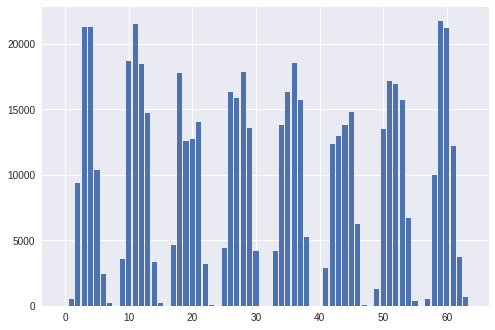

In [94]:
plt.bar(range(64),np.sum(digits.data,axis =0 ))

In [0]:
# lets look if there is a digit which is more intense then others

df['target']=digits.target
df['sum']=np.sum(digits.data,axis =1 )
df['count']=np.sum(digits.data>0,axis =1 )

In [96]:
digits.data>0

array([[False, False,  True, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True,  True, False],
       ...,
       [False, False,  True, ...,  True, False, False],
       [False, False,  True, ...,  True, False, False],
       [False, False,  True, ...,  True,  True, False]])

In [97]:
# lets try to see if there is any siginicant difference in "intensity" of the digits
df.groupby('target').mean()['sum']

target
0    316.938202
1    313.225275
2    313.932203
3    306.836066
4    310.712707
5    307.225275
6    311.248619
7    303.290503
8    329.931034
9    313.288889
Name: sum, dtype: float64

In [0]:
mean_digit = df.groupby('target').mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


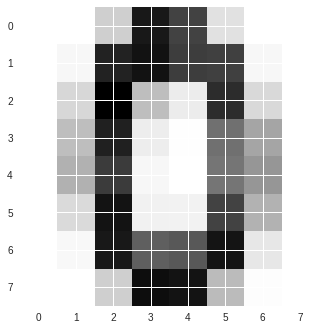

In [99]:
# lets try to plot the average digit

plt.imshow(mean_digit.iloc[0,0:64].reshape([8,8]))

Exercise: plot 10 number means in one plot (hint: look for solution above)

#### Solution

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


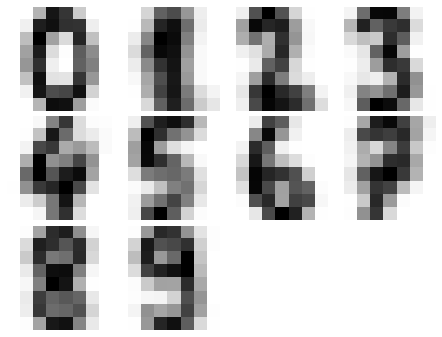

In [100]:

# Figure size (width, height) in inches
fig = plt.figure(figsize=(6, 6))

# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0) 

for i in range(10):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(mean_digit.iloc[i,0:64].reshape([8,8]), cmap=plt.cm.binary, interpolation='nearest')
    #ax.text(0, 7, str(digits.target[i]))

# Show the plot
plt.show()

#### End ofSolution

In [105]:
# FInally, lets see how many samples we have from each class
Counter(digits.target)

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

## Side path - showing data in low dimension

after looking for features in standard ways, lets look for features in ML methods

dimention reduction - from 64 to 2, to see if there are some high dimentionall paterns that may help us

we'll be using pca

### sklearn structure: 
  1. define model
  2. fit
  3. predict (or fit+predict = fit transform)

In [119]:
from sklearn.decomposition import RandomizedPCA, PCA
# Create a Randomized PCA model that takes two components
randomized_pca = RandomizedPCA(n_components=2) #define



# Create a regular PCA model 
pca = PCA(n_components=2)
# Fit  the data to the model
pca.fit_transform(digits.data)


reduced_data_pca = pca.transform(digits.data)

# Inspect the shape
reduced_data_pca.shape

# Print out the data. We saved 2 reductions: pca, and rpca
print(reduced_data_rpca)
#print(reduced_data_pca)
reduced_data = reduced_data_rpca

[[ -1.25436907  21.26422836]
 [  7.95184632 -20.77071796]
 [  6.9848094   -9.85767422]
 ...
 [ 10.79313598  -6.91387173]
 [ -4.86333243  12.34134599]
 [ -0.3449226    6.3642895 ]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
# lets use another PCA model
# Fit and transform the data to the model
reduced_data_rpca = randomized_pca.fit_transform(digits.data)

In [0]:
def d2_plot(x_data,y_data):
  colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
  for i in range(len(colors)):
      x = x_data[digits.target == i]
      y = y_data[digits.target == i]
      plt.scatter(x, y, c=colors[i])
  plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.xlabel('First Principal Component')
  plt.ylabel('Second Principal Component')
  plt.title("PCA Scatter Plot")
  plt.show()

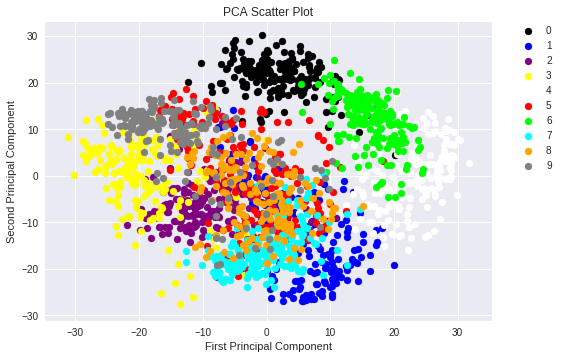

In [120]:
d2_plot(reduced_data[:, 0],reduced_data[:,1])

**Exercise**: try to find more good/better embeddings, with [sklearn.manifold.Isomap, sklearn.manifold.TSNE]

dont forget to complete extra parameters if necessary

Bonus: try sklearn.manifold.SpectralEmbedding sklearn.,manifold.MDS

### Solution

In [0]:
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)

rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(digits.data)
reduced_data=X_projected

In [0]:
X_SVD = decomposition.TruncatedSVD(n_components=2).fit_transform(digits.data)
reduced_data = X_SVD

In [0]:
n_neighbors = 30
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(digits.data)
reduced_data = X_iso

In [134]:
###
X_mds = manifold.MDS(n_components=2, n_init=1, max_iter=100).fit_transform(digits.data)


###
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,eigen_solver="arpack").fit_transform(digits.data)


/usr/local/lib/python3.6/dist-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


In [0]:
###
tsne = manifold.TSNE(n_components=2, random_state=0).fit_transform(digits.data)

In [0]:
reduced_data = tsne

In [0]:
d2_plot(reduced_data[:, 0],reduced_data[:,1])

In [0]:
# TSNE is surprisingly efficient for reducing image dimension. A nice trick sometime applied is presenting the images themselves on the grid

## Train a model

to train a model: 
0. get the data (done)
1.  split the data
2. train/fit a model on training data
3. evaluate on validation
4. rinse and repeat

In [151]:
# Import `train_test_split`
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
# more models later

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [152]:

# Split the data into training and test sets 
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(digits.data, digits.target, digits.images, test_size=0.25, random_state=42)
len (X_train), len (X_test)

(1347, 450)

Exercise:
- Define logisitc regression model - look at how its' done in PCA
- fit it on (x,y) trainset
- predict on  test, and save in predictions


Exercise:
* Show some (4? 16?) images, and their predictions. (on test set of course)
* Add tje real results as well. how does the prediction look?

- use model.score(X_test) to see the accuracy on train and test set

In [66]:
# score model (accuracy)
log_model.score(X_train, y_train) 

0.9948032665181886

In [67]:
log_model.score(X_test, y_test) 

0.9666666666666667

Train results are 3 points better than test. hat does that mean?

Exercise:

Try a few other classification models:


*   from sklearn.neural_network import MLPClassifier
*   from sklearn.ensemble import ExtraTreesClassifier
*  from sklearn.tree import DecisionTreeClassifier
svm.SVC




### Solution

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [0]:
mlp = MLPClassifier()
lr = LogisticRegression()
#rf = RandomForestClassifier(n_estimators=estimators,max_depth=10, oob_score=True, random_state=1)
dt = DecisionTreeClassifier()
et =ExtraTreesClassifier()


In [73]:
for model in [mlp,lr,dt,et]:
  model.fit(X_train, y_train)
  model.fit(X_train, y_train)
  print(model)
  print(model.score(X_train, y_train) )
  print(model.score(X_test, y_test))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
1.0
0.9733333333333334
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.9948032665181886
0.9666666666666667
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_spli

### More modeling

In [0]:

# what are the errors in our models
  # exercise
  # plot some erroneous results (hint: use the correct results plotting)

In [0]:
from sklearn.metrics import confusion_matrix as cm

In [75]:
cm(predicted,y_test)

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  0, 38,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0, 54,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 56,  1,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  1,  0,  1,  0,  1,  0,  0, 36,  3],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 45]])

In [0]:
# cross validation
from sklearn.model_selection import  KFold

kf = KFold(n_splits=5)

In [0]:
digits.data, digits.target

In [0]:
  results=[]
  for samples_train, samples_test in kf.split(digits.data):
      X_trn, X_val, y_trn, y_val = digits.data[samples_train],digits.data[samples_test], digits.target[samples_train], digits.target[samples_test]
      model.fit(X_trn, y_trn)

      score = model.score(X_val, y_val)
      results.append(score)

In [84]:
round(np.mean(results), 3), round(np.std(results), 3)

(0.925, 0.032)

## Ensembling

some times two models are better than 1.

Exercise:
* Take 2 of the best models and average their prediction. text the accuracy.
* Take now 3 modes, and consuct a majority votes between them. what did you get?

## Optional

** Exercise:** Load sklearn.datasets.load_breast_cancer and run all cycle on it:
- load data with "import"
- put the data in a dattaframe, set the column names
- Optional: look at the data at low dimention
- split to train test (train_test_split())
- train a model of your desire
- evaluate
- see results

In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
b_data = load_breast_cancer()